In [1]:
#Importing the libraries necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import time


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and perform initial exploratory data analysis. 

data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(data.head(n=3))
print(test_data.head(n=3))

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  462809    Male           No   22        No  Healthcare              1.0   
1  462643  Female          Yes   38       Yes    Engineer              NaN   
2  466315  Female          Yes   67       Yes    Engineer              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  


1. Data Preprocessing:

In [3]:
# Getting the information regarding the data..
print(data.info())
# After the careful observation we can say that the data consists of null values.
# We need to handle them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None


In [4]:
# Info about the test data.
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB
None


In [5]:
# Before removing the null values.
# From the observation we can impute one column which is Work_Experience column where a large chunk of data is getting missed.
# Impute based on the mean.

imputer = SimpleImputer(strategy='mean')
data['Work_Experience']=imputer.fit_transform(data[['Work_Experience']])
test_data['Work_Experience']=imputer.fit_transform(test_data[['Work_Experience']])

In [6]:
# Handle null values appropriately (e.g., using imputation or removal).
# Dropna will help in dropping the rows with the null values.
data_modified = data.dropna()
test_data_modified = test_data.dropna()
print(data_modified.shape,test_data.shape)

(7376, 11) (2627, 10)


In [7]:
# Convert categorical variables to a suitable numerical format. 
# Using Label Encoder for categorising data.

def fun_label_enc(data):
    label_enc = LabelEncoder()
    data['Gender']=label_enc.fit_transform(data['Gender'])
    data['Ever_Married']=label_enc.fit_transform(data['Ever_Married'])
    data['Graduated']=label_enc.fit_transform(data['Graduated'])
    data['Profession']=label_enc.fit_transform(data['Profession'])
    data['Spending_Score']=label_enc.fit_transform(data['Spending_Score'])
    data['Var_1']=label_enc.fit_transform(data['Var_1'])
    if(data.shape[1]==11):
        data['Segmentation']=label_enc.fit_transform(data['Segmentation'])
        
    return data

In [8]:
enc_data = fun_label_enc(data_modified)
enc_test_data = fun_label_enc(test_data_modified)

print(enc_data.tail(n=2))
# print(enc_test_data.tail(n=2))

          ID  Gender  Ever_Married  Age  Graduated  Profession  \
8066  467299       0             0   27          1           5   
8067  461879       1             1   37          1           4   

      Work_Experience  Spending_Score  Family_Size  Var_1  Segmentation  
8066              1.0               2          4.0      5             1  
8067              0.0               0          3.0      3             1  


In [9]:
X=enc_data.drop(columns=['Segmentation','ID'])
y=enc_data['Segmentation'].values

In [10]:
# encoder = OneHotEncoder(sparse_output=False)
# y_enc = encoder.fit_transform(y.reshape(-1,1))
# print(y_enc.shape)

In [11]:
# Splitting the training and testing data separately from the training data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=47)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5900, 9)
(1476, 9)
(5900,)
(1476,)


2. Neural Network Implementation from Scratch: 

In [12]:
class Two_Layer_NN:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    # For two-layer neural network, we need the sigmoid function and its derivative.
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def der_sigmoid(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    # tanh is f(x)=0 when x<=0 and f(x)=x when x is x>0
    def tanh(self, z):
        return np.maximum(0, z)
    
    # derivative of tanh is f'(x)=0 when x<=0 and f'(x)=1 when x is x>0
    def der_tanh(self, z):
        return np.where(z <= 0, 0, 1)
    
    def nn(self, X, y, num_iterations, alpha,func):
        
        # Number of neurons in the hidden layer will be equal to 64.
        hidden_layer_neurons = 64
        
        n = X.shape[1]  # Update to get the number of training examples correctly
        m = X.shape[0]  # Number of features
        w1 = np.random.randn(hidden_layer_neurons, n)
        b1 = np.random.randn(hidden_layer_neurons, 1)
        w2 = np.random.randn(1, hidden_layer_neurons)
        b2 = np.random.randn(1, 1)
        
        loss_func = [[], []]
        
        for iteration in range(num_iterations):
            
            # Forward Propagation
            z1 = np.dot(w1, X.T) + b1
            if(func=='sigmoid'):
                y1 = self.sigmoid(z1)
            if(func=='tanh'):
                y1 = self.tanh(z1)
            
            z2 = np.dot(w2, y1) + b2
            if(func=='sigmoid'):
                y2 = self.sigmoid(z2)
            if(func=='tanh'):
                y2 = self.tanh(z2)
            
            # Calculate loss
            loss = -1.0/m * np.sum(np.sum(y*np.log(y2)) + np.sum((1-y)*np.log(1-y2)))           
            loss_func[0].append(iteration)
            loss_func[1].append(loss)
#                 print(loss_func[0], " ", loss_func[1])
                
            # Backward Propagation
            dz2 = y2 - y
            dw2 = np.dot(dz2, y1.T)/m
            db2 = np.sum(dz2, axis=1, keepdims=True)/m
            if(func=='sigmoid'):
                dz1 = np.dot(w2.T, dz2) * self.der_sigmoid(z1)
            if(func=='tanh'):
                dz1 = np.dot(w2.T, dz2) * self.der_tanh(z1)
            dw1 = np.dot(dz1, X)/m
            db1 = np.sum(dz1, axis=1, keepdims=True)/m

            # Update weights and biases
            w2 -= alpha * dw2
            b2 -= alpha * db2
            w1 -= alpha * dw1
            b1 -= alpha * db1

        return w1, b1, w2, b2, loss_func

Execution Time is:  25.27609395980835


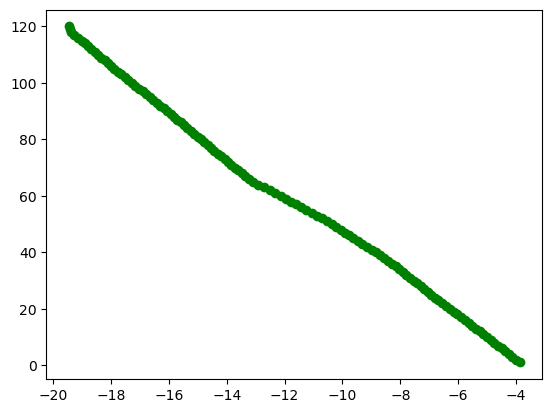

In [13]:
alpha = 0.01
iterations = 400
obj = Two_Layer_NN(X_train,y_train)
start_time=time.time()
w1, b1, w2, b2, cost_list = obj.nn(X_train,y_train,iterations,alpha,'sigmoid')
end_time=time.time()
print("Execution Time is: ",(end_time-start_time))
# print('W1=',w1, '\n', 'b1=',b1, '\n', 'W2=',w2, '\n', 'b2=',b2)
plt.plot(cost_list[1][1:],cost_list[0][1:], 'go')

Execution Time is:  7.889718055725098


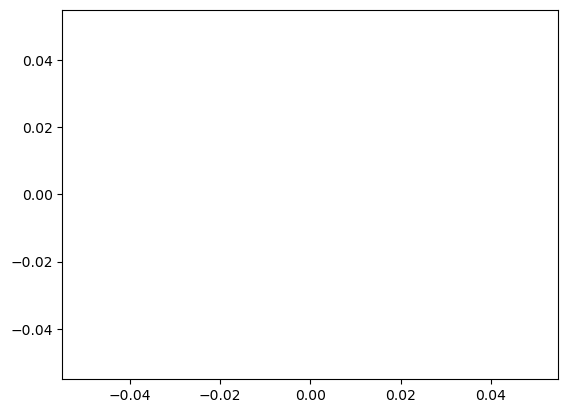

In [14]:
alpha = 0.01
iterations = 400
obj = Two_Layer_NN(X_train,y_train)
func='tanh'
start_time=time.time()
w1, b1, w2, b2, cost_list = obj.nn(X_train,y_train,iterations,alpha,func)
end_time=time.time()
print("Execution Time is: ",(end_time-start_time))
# print('W1=',w1, '\n', 'b1=',b1, '\n', 'W2=',w2, '\n', 'b2=',b2)
plt.plot(cost_list[1][1:],cost_list[0][1:], 'go')

In [15]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [16]:
def predict(X, w1, b1, w2, b2):
    # Forward propagation
    z1 = np.dot(w1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    
    # Threshold output to get binary predictions
    predictions = np.round(a2)
    return predictions

def evaluate(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy

# Assume you have already trained the model and obtained the weights and biases

# Predict using trained model
y_train_pred = predict(X_train.T, w1, b1, w2, b2)
y_test_pred = predict(X_test.T, w1, b1, w2, b2)

# Evaluate the model
train_accuracy = evaluate(y_train, y_train_pred)
test_accuracy = evaluate(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Additional evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred.T.ravel()))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred.T.ravel()))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred.T.ravel()))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred.T.ravel()))

Training Accuracy: 0.2405084745762712
Test Accuracy: 0.24932249322493225
Training Classification Report:
              precision    recall  f1-score   support

           0       0.24      1.00      0.39      1419
           1       0.00      0.00      0.00      1402
           2       0.00      0.00      0.00      1520
           3       0.00      0.00      0.00      1559

    accuracy                           0.24      5900
   macro avg       0.06      0.25      0.10      5900
weighted avg       0.06      0.24      0.09      5900

Test Classification Report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       368
           1       0.00      0.00      0.00       337
           2       0.00      0.00      0.00       340
           3       0.00      0.00      0.00       431

    accuracy                           0.25      1476
   macro avg       0.06      0.25      0.10      1476
weighted avg       0.06      0.25      0.10      147

3. Neural Network using Scikit-learn: 


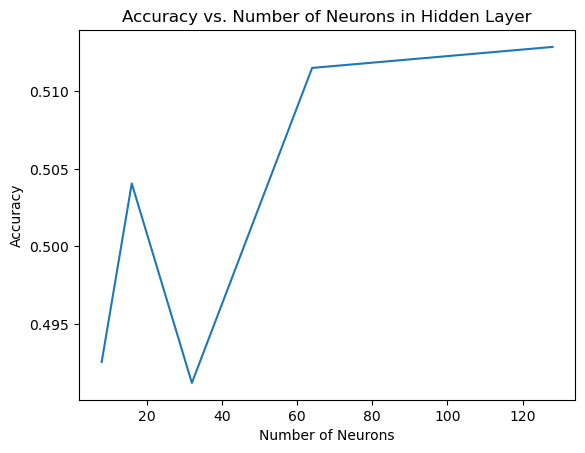

In [17]:
from sklearn.neural_network import MLPClassifier

# Two-layer neural network
mlp_classifier_2_layers = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=1000)
mlp_classifier_2_layers.fit(X_train, y_train)

# Three-layer neural network
mlp_classifier_3_layers = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)
mlp_classifier_3_layers.fit(X_train, y_train)

# Investigate accuracy with different number of neurons
neuron_counts = [8, 16, 32, 64, 128]
accuracies = []
for neurons in neuron_counts:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(neurons,), activation='relu', max_iter=1000)
    mlp_classifier.fit(X_train, y_train)
    accuracies.append(mlp_classifier.score(X_test, y_test))

# Plot the graph
import matplotlib.pyplot as plt
plt.plot(neuron_counts, accuracies)
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neurons in Hidden Layer')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate neural network models
y_pred_mlp_2_layers = mlp_classifier_2_layers.predict(X_test)
y_pred_mlp_3_layers = mlp_classifier_3_layers.predict(X_test)

print("MLP Classifier (Two Layers):")
print(confusion_matrix(y_test, y_pred_mlp_2_layers))
print(classification_report(y_test, y_pred_mlp_2_layers))

print("MLP Classifier (Three Layers):")
print(confusion_matrix(y_test, y_pred_mlp_3_layers))
print(classification_report(y_test, y_pred_mlp_3_layers))

# Evaluate logistic regression model
y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

MLP Classifier (Two Layers):
[[197  75  39  57]
 [128 112  62  35]
 [ 52  87 162  39]
 [123  15  11 282]]
              precision    recall  f1-score   support

           0       0.39      0.54      0.45       368
           1       0.39      0.33      0.36       337
           2       0.59      0.48      0.53       340
           3       0.68      0.65      0.67       431

    accuracy                           0.51      1476
   macro avg       0.51      0.50      0.50      1476
weighted avg       0.52      0.51      0.51      1476

MLP Classifier (Three Layers):
[[187  53  50  78]
 [118  82  92  45]
 [ 48  52 195  45]
 [ 99   7  15 310]]
              precision    recall  f1-score   support

           0       0.41      0.51      0.46       368
           1       0.42      0.24      0.31       337
           2       0.55      0.57      0.56       340
           3       0.65      0.72      0.68       431

    accuracy                           0.52      1476
   macro avg       0.51  